In [1]:
from dataset_utils import mnist
from dataset_utils import mnist_m
from dataset_utils import svhn

import os
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

In [2]:
if not os.path.exists('TFRecords'):
    os.mkdir('TFRecords')

# Table of Contents 

---

In alphabetical order,

  * [MNIST dataset](#mnist)
  * [MNIST-M dataset](#mnist-m)
  * [SVHN dataset](#svhn)

## General API

--- 

The module for a dataset `data` is contained in `dataset_utils.data.py`. It contains a converter, `DataConverter` and a loader `DataLoader`.


#### Converter
The converter contains one method, `convert` that generates the TFRecords in the given `target_path`. Additionally, this method takes as keyword argument `sort`; If this is True, the entries in the TFRecords will be sorted by class labels when possible (e.g. classification task). Note that this means the `shuffle_buffer` size should be at least equal to the number of samples in the dataset for proper shuffling (hence not optimal for large datasets), but it can be convenient to quickly filter/sample the dataset based on classes.


#### Loader
The loader simply builds a proper parsing function to extract data from the TFRecords and format it correctly. Such a function can then be passed to the `tf.data.Dataset` API map function.

In [3]:
def get_tf_dataset(path_to_tfrecords, parsing_fn, shuffle_buffer=1, batch_size=8):
    """Create a basic tensorflow Dataset object from a TFRecords.
    
    Args:
        path_to_tfrecords: Path to the TFrecords
        parsing_fn: parsing function to apply to every element (load Examples)
        shuffle_buffer: Shuffle buffer size to randomize the dataset
        batch_size: Batch size
    """
    print('Creating dataset with batch_size %d and shuffle buffer %d' % (
            batch_size, shuffle_buffer))
    data = tf.data.TFRecordDataset(path_to_tfrecords)
    data = data.shuffle(shuffle_buffer)
    data = data.map(parsing_fn)
    data = data.repeat()
    data = data.batch(batch_size)
    iterator = data.make_one_shot_iterator()
    in_ = iterator.get_next()
    return in_

### MNIST
---
<a id='mnist'></a>

Original Download [[link]](http://yann.lecun.com/exdb/mnist/)

Dataset will contain:

  * `image`: (28, 28, 1) float array in [0, 1]
  * `class`: scalar in 0-9
  * `id`: The image index in the original dataset

In [4]:
source_path = os.path.expanduser('~/Data/MNIST/')
target_path = 'TFRecords/tf_mnist'

In [5]:
%%time
# convert MNIST dataset to TFRecords
converter = mnist.MNISTConverter(source_path)
converter.convert(target_path)

Loading original MNIST data from /home/aroyer/Data/MNIST/
Load train: 60000 / 60000
Wrote train in file TFRecords/tf_mnist_train

Load test: 10000 / 10000
Wrote test in file TFRecords/tf_mnist_test

CPU times: user 10.3 s, sys: 1.15 s, total: 11.4 s
Wall time: 11.5 s


Creating dataset with batch_size 8 and shuffle buffer 1


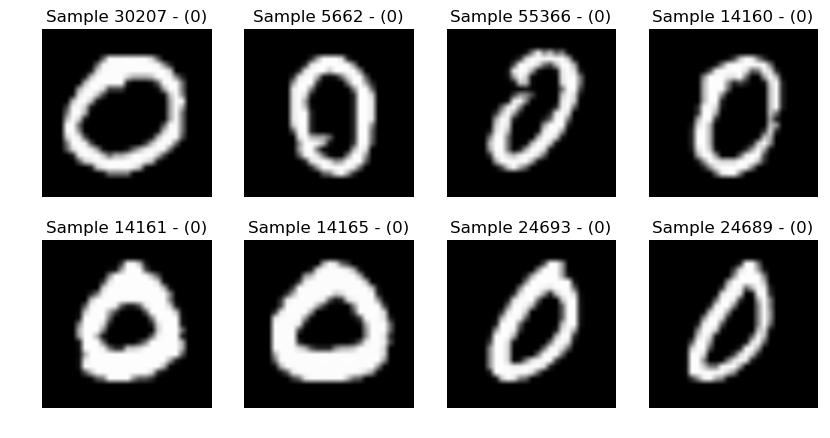

In [6]:
# load training dataset and resize image to 128
loader = mnist.MNISTLoader(resize=128)
with tf.Graph().as_default():
    data = get_tf_dataset('%s_train' % target_path, loader.parsing_fn)
    with tf.Session() as sess:
        data_ = sess.run(data)
# Display
_, axis = plt.subplots(2, 4, figsize=(10, 5))
for i, ax in enumerate(axis.flatten()):
    ax.set_title('Sample %d - (%d)' % (data_['id'][i], data_['class'][i]))
    ax.imshow(np.tile(data_['image'][i], (1, 1, 3)))
    ax.set_axis_off()
plt.show()

### SVHN
---
<a id='svhn'></a>

Original Download [[link]](http://ufldl.stanford.edu/housenumbers/)

**Format 2** (32x32 images saved in a mat file)

Dataset will contain:

  * `image`: (32, 32, 3) float array in [0, 1]
  * `class`: scalar in 0-9
  * `id`: The image index in the original dataset

In [7]:
source_path = os.path.expanduser('~/Data/SVHN/')
target_path = 'TFRecords/tf_svhn'

In [8]:
%%time
# convert SVHN dataset to TFRecords
converter = svhn.SVHNConverter(source_path)
converter.convert(target_path)

Loading original SVHN data from /home/aroyer/Data/SVHN/
Load train: 73257 / 73257
Wrote train in file TFRecords/tf_svhn_train

Load test: 26032 / 26032
Wrote test in file TFRecords/tf_svhn_test

CPU times: user 13.7 s, sys: 1.06 s, total: 14.8 s
Wall time: 18.6 s


Creating dataset with batch_size 8 and shuffle buffer 1


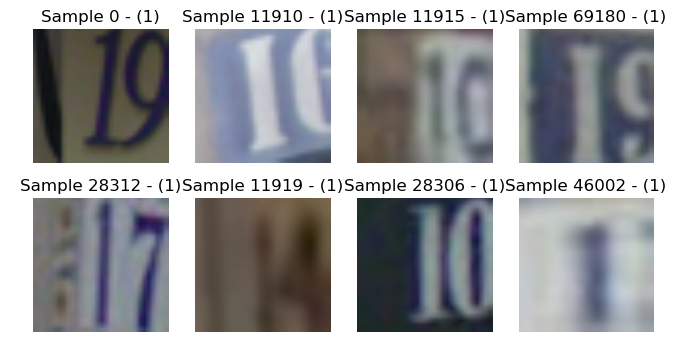

In [9]:
# load training dataset
loader = svhn.SVHNLoader(resize=64)
with tf.Graph().as_default():
    data = get_tf_dataset('%s_train' % target_path, loader.parsing_fn)
    with tf.Session() as sess:
        data_ = sess.run(data)
# Display
_, axis = plt.subplots(2, 4, figsize=(8, 4))
for i, ax in enumerate(axis.flatten()):
    ax.set_title('Sample %d - (%d)' % (data_['id'][i], data_['class'][i]))
    ax.imshow(data_['image'][i])
    ax.set_axis_off()
plt.show()

## MNIST-M

---
<a id='mnist-m'></a>

Original Download [[link]](http://yaroslav.ganin.net/) (**unpacked version**)

Dataset will contain:

  * `image`: (32, 32, 3) float array in [0, 1]
  * `class`: scalar in 0-9
  * `id`: The image index in the original dataset

In [10]:
source_path = os.path.expanduser('~/Data/mnist_m/')
target_path = 'TFRecords/tf_mnist-m'

In [11]:
%%time
# convert MNIST-M dataset to TFRecords
converter = mnist_m.MNISTMConverter(source_path)
converter.convert(target_path)

Loading original MNIST-M data from /home/aroyer/Data/mnist_m/
Load train: 59001 / 59001
Wrote train in file TFRecords/tf_mnist-m_train

Load test: 9001 / 9001
Wrote test in file TFRecords/tf_mnist-m_test

CPU times: user 19.7 s, sys: 1.36 s, total: 21 s
Wall time: 22.5 s


Creating dataset with batch_size 8 and shuffle buffer 1


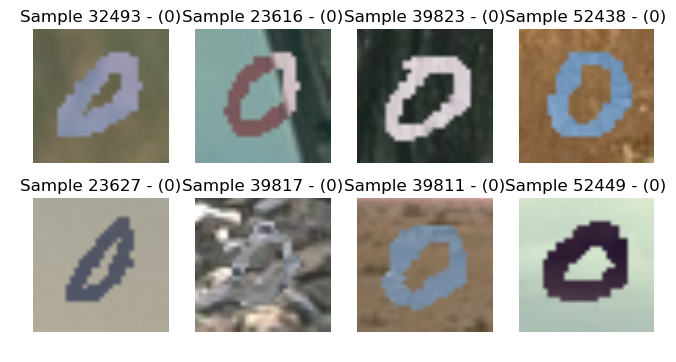

In [12]:
# load training dataset
loader =  mnist_m.MNISTMLoader(resize=64)
with tf.Graph().as_default():
    data = get_tf_dataset('%s_train' % target_path, loader.parsing_fn)
    with tf.Session() as sess:
        data_ = sess.run(data)
# Display
_, axis = plt.subplots(2, 4, figsize=(8, 4))
for i, ax in enumerate(axis.flatten()):
    ax.set_title('Sample %d - (%d)' % (data_['id'][i], data_['class'][i]))
    ax.imshow(data_['image'][i])
    ax.set_axis_off()
plt.show()